In [2]:
import numpy as np
import uncertainties as u
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams['figure.figsize'] = (20, 16)
%matplotlib inline

Here is the total field from the Helmholtz coil where N is the nimber of turns on one side of the coil:
$$B_y = \frac{\mu_0 N I R_z^2}{\big(R_y^2 + R_z^2\big)^\frac{3}{2}}$$

we want to calculate the ratio $$\frac{R_z^2}{(R_y^2 + R_z^2)^\frac{3}{2}}$$

In [3]:
m_0 = u.ufloat(4*np.pi*10**-7, 1e-15)
N = u.ufloat(21, 0) # number of turns on one side

radius = u.ufloat(22.743e-3, 0.05e-3)
spacing = u.ufloat(24.389e-3, 0.025e-3)
print(radius, spacing)

R_x = radius
R_y = (spacing/2)
R_z = radius

helmholtz_ratio = (R_z**2)/((R_y**2 + R_z**2)**(3/2))
print(helmholtz_ratio)

0.02274+/-0.00005 0.024389+/-0.000025
30.098+/-0.030


In [10]:
h_coil_multiply_by_current_to_get_b = ((m_0 * N) * helmholtz_ratio)
print(format(h_coil_multiply_by_current_to_get_b,'e'))

(7.943+/-0.008)e-04


$$RMS = \sqrt{(\frac{\partial B}{\partial x}+\Delta x)^2 + (\frac{\partial B}{\partial y}+\Delta y)^2}$$

### Translational field gain and error anylisis

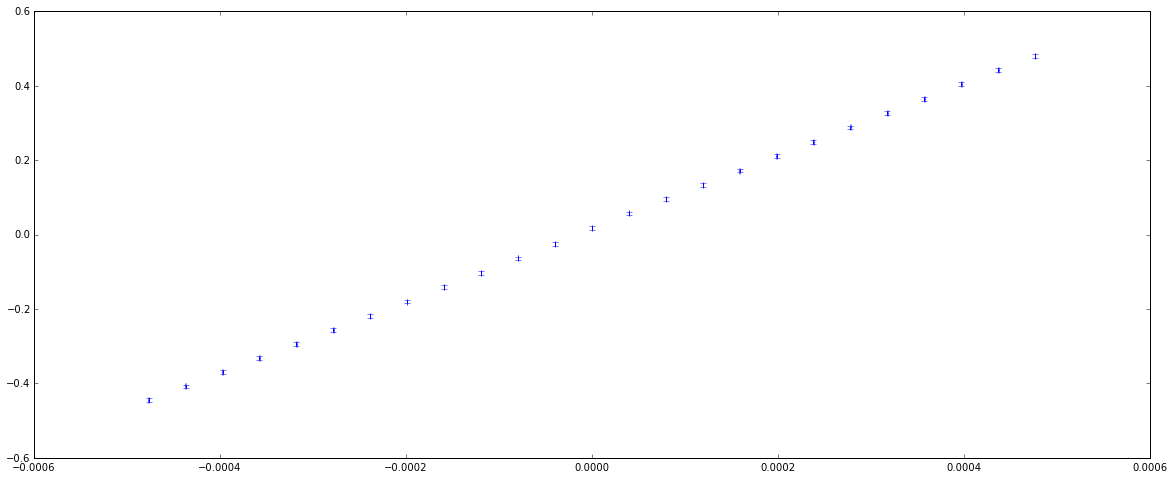

normal slope: (975.15132991045743, 0.016240000000000001, 0.99998074798269176, 2.8160372871939574e-52, 1.2617330808365836)
plus slope: (991.25010505073749, 0.016240000000000001, 0.9999044482150804, 2.8232399794847306e-44, 2.8574908814501585)
minus slope: (959.08469130993592, 0.016239999999999997, 0.99999209645522513, 1.0072504342924042e-56, 0.79509966799890486)


In [11]:
# import the translational data (small helmholtz coil data)
helmholtz_data = np.genfromtxt('trans_field.txt', delimiter= ',', skip_header= True)

h_coil_current = helmholtz_data[:,0] # separate out the current data

# now we gererate an array of ufloats so we can propogate the error in the b field into the calibration data
h_coil_current_with_error = []
for i in range(len(h_coil_current)):
    current_with_error = u.ufloat(h_coil_current[i], 0.0005) # +/- .5 mA
    h_coil_current_with_error.append(current_with_error) 

h_coil_b = h_coil_current * h_coil_multiply_by_current_to_get_b
#print(h_coil_b)
   
    
# make an errorbar plot:
h_coil_voltage = helmholtz_data[:,1] #extract the voltage data

# extract error and values from the b field so we can plot it
h_coil_b_field_error = [val.s for val in h_coil_b]
h_coil_b_field_values = [val.n for val in h_coil_b]

plt.figure(figsize = (20,8))
plt.errorbar(h_coil_b_field_values, 
             h_coil_voltage, 
             xerr = h_coil_b_field_error, 
             yerr = 0.005, marker = 'None', 
             linestyle= 'None')
plt.show()

'''
uncertain_current = []
uncertain_voltage = []
# add uncertinties to the current (convert to ufloat):
for i in h_coil_current:
    uncertain_current.append(0.0005) # +/- .5 mA

h_coil_sensor_output_voltage = helmholtz_data[:,1]
for i in h_coil_voltage:
    uncertain_voltage.append(0.005) # +/- 5 mV
'''

    
# compute the slope by fitting a line:
#slope, intercept, rvalue, pvalue, sterr = 
print("normal slope: " + str(stats.linregress(h_coil_b_field_values,h_coil_voltage)))

# find the worst case slopes
plusField = []
minusField = []
plusVolts = []
minusVolts = []
for i in range(len(h_coil_b_field_values)):
    if h_coil_b_field_values[i] > 0:
        plusField.append(h_coil_b_field_values[i]-h_coil_b_field_error[i])
        minusField.append(h_coil_b_field_values[i]+h_coil_b_field_error[i])
        plusVolts.append(h_coil_voltage[i]+0.005)
        minusVolts.append(h_coil_voltage[i]-0.005)
    elif h_coil_b_field_values[i] < 0:
        plusField.append(h_coil_b_field_values[i]+h_coil_b_field_error[i])
        minusField.append(h_coil_b_field_values[i]-h_coil_b_field_error[i])
        plusVolts.append(h_coil_voltage[i]-0.005)
        minusVolts.append(h_coil_voltage[i]+0.005)
    elif h_coil_b_field_values[i] == 0:
        plusField.append(h_coil_b_field_values[i])
        minusField.append(h_coil_b_field_values[i])
        plusVolts.append(h_coil_voltage[i])
        minusVolts.append(h_coil_voltage[i])
        
print('plus slope: ' + str(stats.linregress(plusField,plusVolts)))

print('minus slope: ' + str(stats.linregress(minusField,minusVolts)))

#print(h_coil_b_field_error)



 create sorst case scinario data to find the +- error on our sensor calibration: 

we find the translational sensor gain to be: $975 \pm 20 \frac{V}{T}$


### Radial Field Sensor Calibration

We also used the old solinoid (575 turns) from our previous LRC experement to calibrate the radial component of the hall probe:

The equation for the field in a solinoid is:
$$B = \mu_0 N I$$

In [12]:
N_s = u.ufloat(575, 0.1)
solenoid_multiply_by_current_to_get_b = (m_0 * N_s)
#solenoid_multiply_by_current_to_get_b = (4*np.pi*1e-7) * 575
print(format(solenoid_multiply_by_current_to_get_b,'e')+ ' T/A')

(7.2257+/-0.0013)e-04 T/A


[[ 0.     0.015]
 [ 0.25   0.37 ]
 [ 0.53   0.768]
 [ 0.7    1.003]
 [ 1.08   1.535]
 [ 1.25   1.776]
 [ 1.55   2.186]
 [ 1.74   2.456]
 [ 2.06   2.899]
 [ 2.26   3.181]
 [ 2.52   3.546]
 [ 2.77   3.889]
 [ 3.05   4.295]
 [ 0.     0.013]
 [-3.05  -4.255]
 [-0.25  -0.339]
 [-2.75  -3.834]
 [-0.5   -0.69 ]
 [-2.5   -3.486]
 [-0.75  -1.042]
 [-2.25  -3.148]
 [-1.    -1.396]
 [-2.    -2.793]
 [-1.25  -1.745]
 [-1.75  -2.448]
 [-1.5   -2.098]
 [-3.05  -4.266]]
[0.0+/-3.6128315516282623e-07, 0.0001806415775814131+/-3.6264649266818556e-07, 0.00038296014447259584+/-3.6737081158759095e-07, 0.0005057964172279567+/-3.7183771736474345e-07, 0.0007803716151517047+/-3.859333734238093e-07, 0.0009032078879070655+/-3.9395371454987804e-07, 0.0011199777810047614+/-4.1044400047142685e-07, 0.0012572653799666352+/-4.2229783454451767e-07, 0.0014884865992708441+/-4.4445220596162003e-07, 0.0016329998613359743+/-4.595448884586813e-07, 0.0018208671020206442+/-4.804237873673523e-07, 0.0020015086796020573+/-5.01688

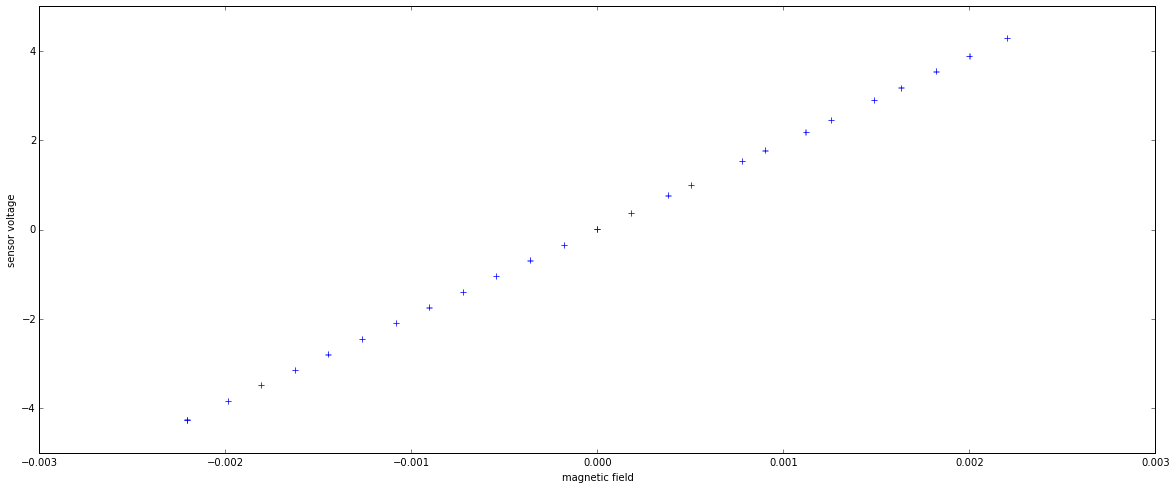

'\nuncertain_current = []\nuncertain_voltage = []\n# add uncertinties to the current (convert to ufloat):\nfor i in h_coil_current:\n    uncertain_current.append(0.0005) # +/- .5 mA\n\nh_coil_sensor_output_voltage = helmholtz_data[:,1]\nfor i in h_coil_voltage:\n    uncertain_voltage.append(0.005) # +/- 5 mV\n'

In [13]:
# import the radial data (solenoid coil data)
solenoid_data = np.genfromtxt('radial_field.txt', delimiter= ',', skip_header= True)
print(solenoid_data)

solenoid_current = solenoid_data[:,0] # separate out the current data
#print(solenoid_current)

# now we gererate an array of ufloats so we can propogate the error in the b field into the calibration data
solenoid_current_with_error = []
for i in range(len(solenoid_current)):
    current_with_error = u.ufloat(solenoid_current[i], 0.0005) # +/- .5 mA
    solenoid_current_with_error.append(current_with_error) 

solenoid_b = []
for i in range(len(solenoid_current_with_error)):
    solenoid_b.append(solenoid_current_with_error[i] * solenoid_multiply_by_current_to_get_b)
print(solenoid_b)
   
    
# make an errorbar plot:
solenoid_voltage = solenoid_data[:,1] #extract the voltage data

# extract error and values from the b field so we can plot it
solenoid_b_field_error = [val.s for val in solenoid_b]
solenoid_b_field_values = [val.n for val in solenoid_b]

print("normal slope: " + str(stats.linregress(solenoid_b_field_values, solenoid_voltage)))


plt.figure(figsize = (20,8))
plt.xlabel('magnetic field')
plt.ylabel('sensor voltage')
plt.errorbar(solenoid_b_field_values, 
             solenoid_voltage, 
             xerr = solenoid_b_field_error, 
             yerr = 0.005, marker = 'None', 
             linestyle= 'None')
plt.show()

'''
uncertain_current = []
uncertain_voltage = []
# add uncertinties to the current (convert to ufloat):
for i in h_coil_current:
    uncertain_current.append(0.0005) # +/- .5 mA

h_coil_sensor_output_voltage = helmholtz_data[:,1]
for i in h_coil_voltage:
    uncertain_voltage.append(0.005) # +/- 5 mV
'''

    
# compute the slope by fitting a line:
#slope, intercept, rvalue, pvalue, sterr = 



#print(h_coil_b_field_error)



for the radial field component the gain and error is: $1940 \pm 5$ Volts per Tesla